<a href="https://colab.research.google.com/github/JayMalde/Movie-Genre-Classificaation-Colab/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Genre Classification**

## **Pre Preocessing**

importing libraries / Packages

In [2]:
import numpy as np
import pandas as pd

loading the dataset

In [ ]:
df = pd.read_csv('/content/kaggle_movie_train.csv')

checking for column names

In [ ]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

checking for number of rows & columns

In [ ]:
df.shape

(22579, 3)

In [ ]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


Finding any NaN values

In [ ]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

Importing libraries for visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

visualizing the count of 'genre' column from the dataset

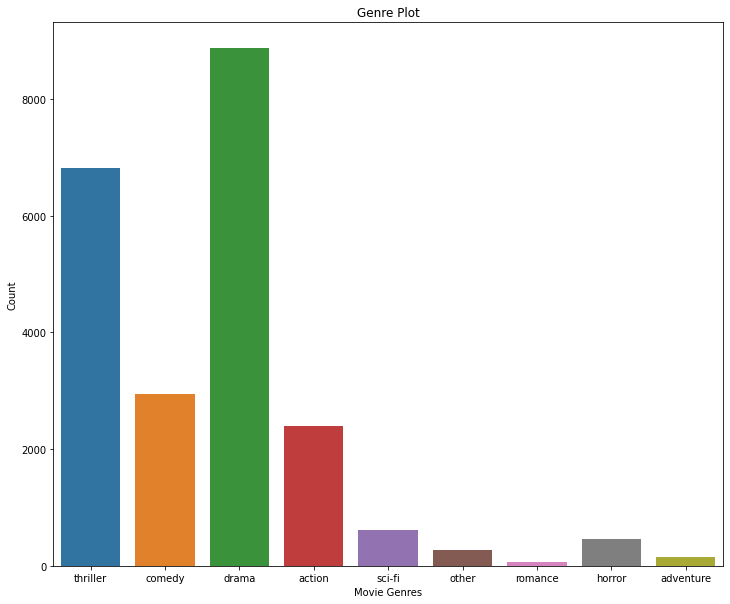

In [ ]:
plt.figure(figsize=(11,10))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

finding unique genres

In [ ]:
movie_genre = list(df['genre'].unique())
movie_genre

['thriller',
 'comedy',
 'drama',
 'action',
 'sci-fi',
 'other',
 'romance',
 'horror',
 'adventure']

Mapping the genres to values

In [ ]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


removing the 'id' column

In [ ]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

## **NLP**

Importing libraries for performing Natural Language Processing

Downloading stopwords : - words which have no meaning by itself

In [ ]:
import nltk # pip install nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.shape

(22579, 2)

Removing stopwords, special characters, converting to lowercase,  stemming, etc.

In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words 
  # converting string into an n dimensional array of words
  words = dialog.split()

  # Removing the stop words
  # for eg :- not
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words 
  # for eg :- replacing loving into original word love
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a collection of cleaned data
  corpus.append(dialog)

After NLP Process

In [ ]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

getting rows where genre is 4 or drama


In [ ]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [ ]:
len(corpus)

22579

Creating Collection of Words for Top 3 Genre

## **Splitting Data**

**Bag Of Words** conveting unique words in the corpus into numeric values upto 10000 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

Adding genre column values as y

In [ ]:
y = df['genre'].values

splitting x,y data into train & test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## **Comparing Accuracy Percantege of Various Models**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb1_classifier = GaussianNB()
nb1_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_y_pred1 = nb1_classifier.predict(X_test)
score1 = accuracy_score(y_test, nb_y_pred1)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 79.76%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators=40)
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_y_pred = rfc_classifier.predict(X_test)
score3 = accuracy_score(y_test, rfc_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score3*100,2)))

---- Score ----
Accuracy score is: 73.41%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier()
dtc_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc_y_pred = dtc_classifier.predict(X_test)
score4 = accuracy_score(y_test, dtc_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score4*100,2)))

---- Score ----
Accuracy score is: 73.67%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_y_pred = knn_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
score5 = accuracy_score(y_test, knn_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score5*100,2)))

---- Score ----
Accuracy score is: 81.62%


Creating a Naive Bayes Model and Fitteing & Predicting

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)

Accuracy of Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score*100,2)))

---- Score ----
Accuracy score is: 89.57%


Confusion Matrix of Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [ ]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

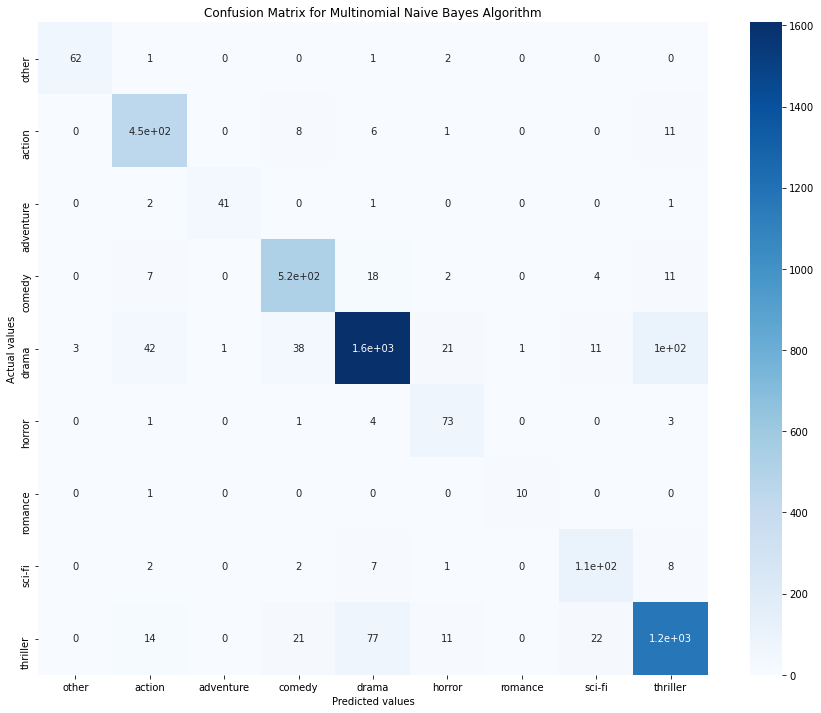

In [ ]:
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

Comparing Accuracy & Selecting One for Creating Model

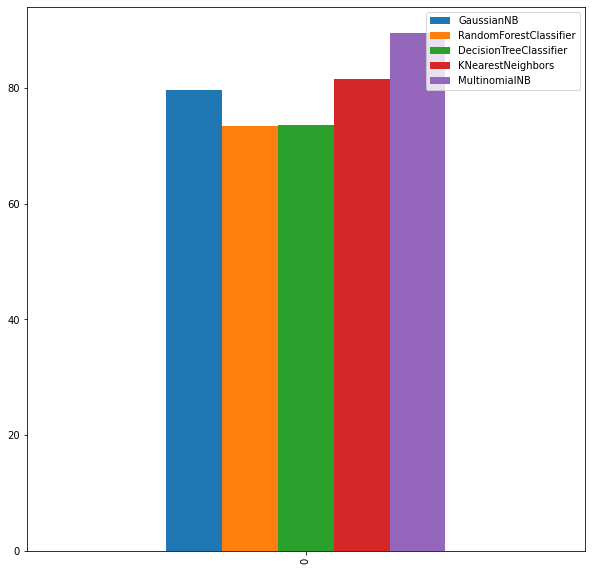

In [6]:
scores={"GaussianNB":79.76,"RandomForestClassifier":73.41,"DecisionTreeClassifier":73.67,"KNearestNeighbors":81.62,"MultinomialNB":89.57}
scores_df=pd.DataFrame([scores])
scores_df.plot(kind="bar",figsize=(10,10))